# Data description

The Behavioral Risk Factor Surveillance System (BRFSS) is the USA's premier system of health-related telephone surveys
that collect state data about residents regarding their health-related risk behaviors, chronic health conditions, and
use of preventive services. This dataset consists of 19 out of 304 variables that relates to lifestyle factors of a
person that can be contributed to being at risk with any form of Cardiovascular Diseases.
Link to the dataset: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [176]:
df = pd.read_csv("CVD_cleaned.csv")
df = df[(df['Diabetes'] == 'No') | (df['Diabetes'] == 'Yes')] # removing difficult categories
df['Cancer'] = np.where((df['Skin_Cancer'] == 'Yes') | (df['Other_Cancer'] == 'Yes'), 'Yes', 'No')
df.drop(columns=['Skin_Cancer','Other_Cancer'], inplace=True)
df.rename(columns={'Exercise': 'Exercised_(30 days)'}, inplace=True)
categorical_cols = ["General_Health", "Checkup", "Exercised_(30 days)", "Heart_Disease", "Cancer","Depression",
                    "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"]
cols = df.columns.tolist()
numerical_cols = [col for col in cols if col not in categorical_cols]

In [177]:
columns_list = df.columns.tolist()
data_types = df.dtypes.tolist()
# Combine the columns and data types into a dictionary for easier access
columns_data_types = dict(zip(columns_list, data_types))
# Print the list of columns and their data types
for column, data_type in columns_data_types.items():
    print(f"Column: {column}, Data Type: {data_type}")
print(f"number of rows in the dataset: {df.shape[0]}")

Column: General_Health, Data Type: object
Column: Checkup, Data Type: object
Column: Exercised_(30 days), Data Type: object
Column: Heart_Disease, Data Type: object
Column: Depression, Data Type: object
Column: Diabetes, Data Type: object
Column: Arthritis, Data Type: object
Column: Sex, Data Type: object
Column: Age_Category, Data Type: object
Column: Height_(cm), Data Type: float64
Column: Weight_(kg), Data Type: float64
Column: BMI, Data Type: float64
Column: Smoking_History, Data Type: object
Column: Alcohol_Consumption, Data Type: float64
Column: Fruit_Consumption, Data Type: float64
Column: Green_Vegetables_Consumption, Data Type: float64
Column: FriedPotato_Consumption, Data Type: float64
Column: Cancer, Data Type: object
number of rows in the dataset: 299312


## Column description

Since the dataset is gathered from a survey, the description of some columns will be in the form of the question
that
was asked regarding the corresponding column.
General_Health: "Would you say that in general your health is—"
Checkup: "About how long has it been since you last visited a doctor for a routine checkup?"
Exercised_(30 days): "During the past month, other than your regular job, did you participate in any physical activities or
exercises such as running etc..."
Heart_Disease: Respondents that reported having coronary heart disease or mycardialinfarction
Cancer: Respondents that reported having cancer
Depression: Respondents that reported having a depressive disorder
Diabetes: Respondents that reported having a diabetes
Arthritis: Respondents that reported having an Arthritis
Sex: Respondent's Gender
Age_Category: Respondent's Age category
Height_(cm): Respondent's height in cm
Weight_(kg): Respondent's weight in kg
BMI: Respondent's BMI
Smoking_History: Respondents that reported having a history of smoking
Alcohol_Consumption: number of Days in past 30 that had alcoholic beverage
Fruit_Consumption: number of times fruit was consumed in the past 30 days
Green_Vegetables_Consumption: number of times green vegetables were consumed in the past 30 days
FriedPotato_Consumption: number of times fried potatoes were consumed in the past 30 days


# Exploratory Data Analysis

In [178]:
def plot_numerical(data, column_name, chart="hist", num_bins=20):
    """
    Plots a chart for the given numerical data column.

    Parameters:
    - data (DataFrame): The DataFrame containing the categorical column.
    - column_name (str): The name of the categorical column.
    - chart (str): type of chart to be plotted
    -num_bins (int): number of bins
    Returns:
    None
    """
    if chart == "hist":
        plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
        plt.hist(data[column_name], bins=num_bins, edgecolor='black')  # Customize bins and edgecolor if needed
        mean_value = np.mean(data[column_name])
        median_value = np.median(data[column_name])
        mode_value = stats.mode(data[column_name])[0][0]
        sd_value = np.std(data[column_name])
        min_value = np.min(data[column_name])
        max_value = np.max(data[column_name])
        q1 = np.percentile(data[column_name], 25)  # 1st quartile (25th percentile)
        q3 = np.percentile(data[column_name], 75)  # 3rd quartile (75th percentile)

        plt.annotate(f'Mean: {mean_value:.2f}', xy=(0.98, 0.95), xycoords='axes fraction', color='salmon', ha='right',
                     fontsize=12)
        plt.annotate(f'Median: {median_value:.2f}', xy=(0.98, 0.90), xycoords='axes fraction', color='green', ha='right', fontsize=12)
        plt.annotate(f'Mode: {mode_value:.2f}', xy=(0.98, 0.85), xycoords='axes fraction', color='royalblue',
                     ha='right',
                     fontsize=12)
        plt.annotate(f'sd: {sd_value:.2f}', xy=(0.98, 0.80), xycoords='axes fraction', color='orange', ha='right', fontsize=12)
        plt.annotate(f'min: {min_value:.2f}', xy=(0.98, 0.75), xycoords='axes fraction', color='cyan', ha='right', fontsize=12)
        plt.annotate(f'max: {max_value:.2f}', xy=(0.98, 0.70), xycoords='axes fraction', color='gold', ha='right',
                     fontsize=12)
        plt.annotate(f'25%: {q1:.2f}', xy=(0.98, 0.65), xycoords='axes fraction', color='darkviolet', ha='right',
                     fontsize=12)
        plt.annotate(f'75%: {q3:.2f}', xy=(0.98, 0.60), xycoords='axes fraction', color='deeppink', ha='right',
                     fontsize=12)
        plt.axvline(mean_value, color='salmon', linestyle='-', linewidth=2, label='Mean')
        plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label='Median')
        plt.axvline(q1, color='darkviolet', linestyle='-', linewidth=2, label='q1')
        plt.axvline(q3, color='deeppink', linestyle='-', linewidth=2, label='q3')
        if "Consumption" in column_name:
            plt.title(f'distribution of {column_name} in the past 30 days')
        else:
            plt.title(f'distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.tight_layout()
    else:
        plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
        plt.boxplot(data[column_name], vert=False)  # Vert=False for horizontal box plot
        plt.title(f'{column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Values')
        plt.tight_layout()


In [179]:
def plot_categorical(data, column_name):
    """
    Plots a bar plot for the given categorical data column.
    Parameters:
    - data (DataFrame): The DataFrame containing the categorical column.
    - column_name (str): The name of the categorical column.

    Returns:
    - None (displays the histogram using Matplotlib)
    """
    if column_name == 'Diabetes':
        plt.figure(figsize=(8, 6))
    else:
        plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    ax = sns.countplot(data=data, x=column_name, palette='dark')  # Use a different palette for colors
    plt.title(f'distribution of {column_name} by category')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

    # Calculate percentages and add labels on top of each bar
    patches = ax.patches
    total_count = len(data[column_name])
    for patch in patches:
        percentage = patch.get_height() / total_count
        offset = max(data[column_name].value_counts()) * 0.01
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + offset
        ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')

    plt.tight_layout()
    plt.show()

for categorical columns we decided to use a bar chart with percentages marked on top of each bar, this way we get
the advantage of easy visual comparison between categories, in addition to an easy distribution understanding that
is achieved with a pie chart (without its disadvantages).

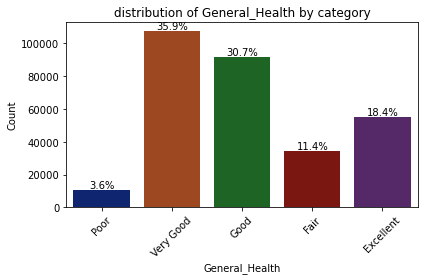

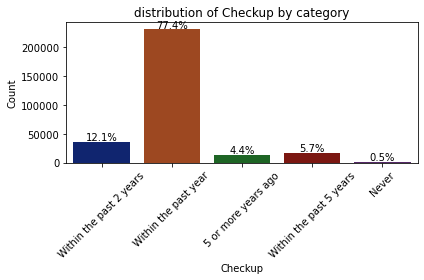

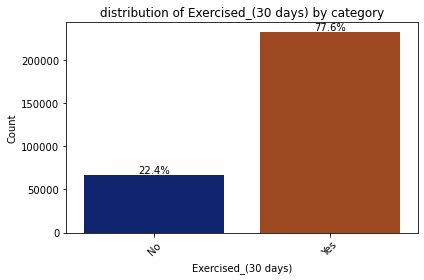

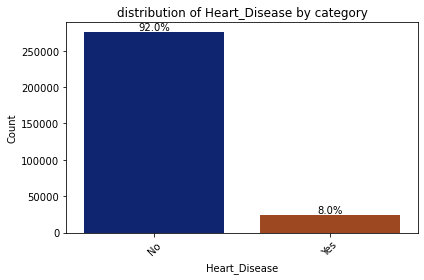

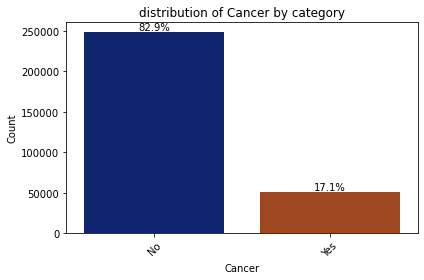

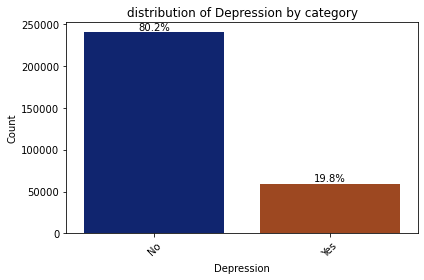

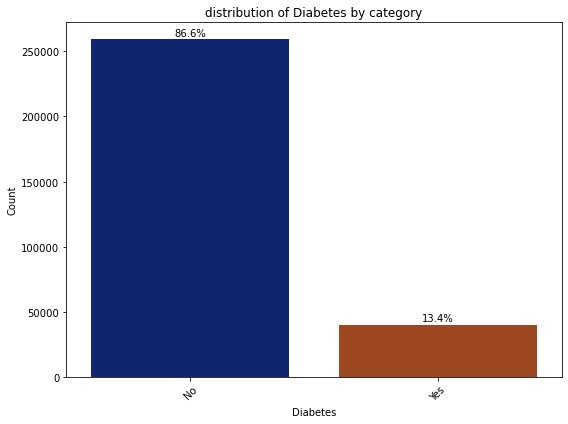

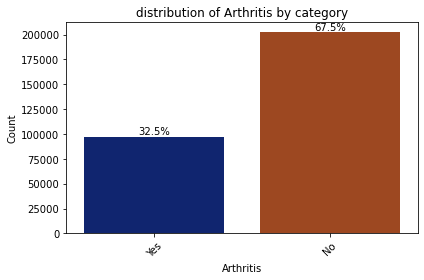

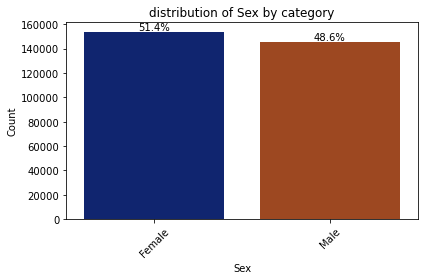

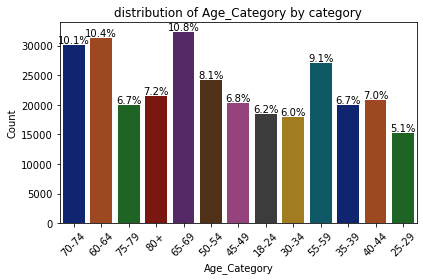

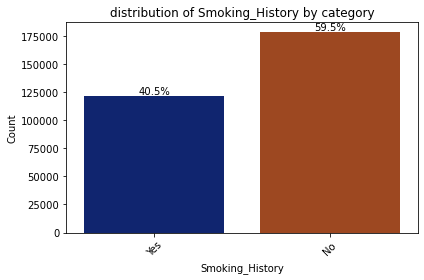

In [180]:
for col in categorical_cols:
    plot_categorical(df,col)

for numerical columns we decided to use a histogram to depict the distribution of the data in the clearest manner
possible. in addition, we added a description of key statistical values, having the most relevant ones shown with a
matching colored line on top of the chart in the corresponding place on the x axis.

<ipython-input-178-6933a8356dbd>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(data[column_name])[0][0]


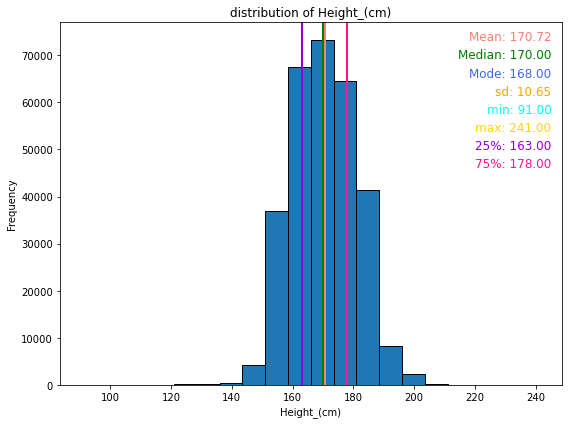

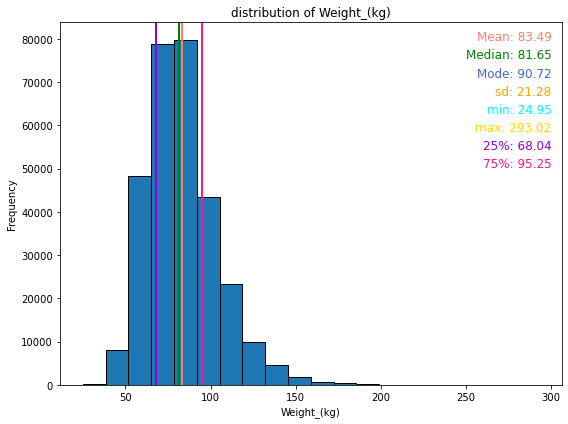

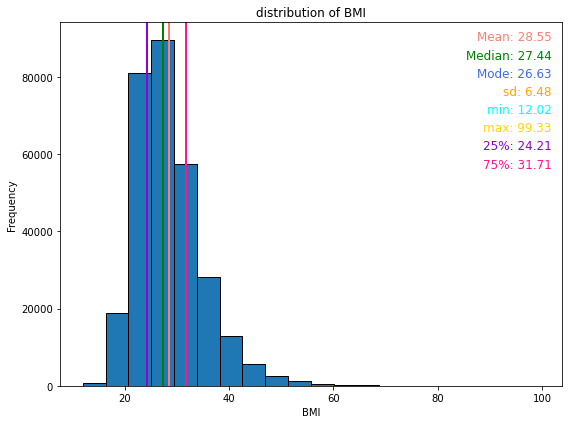

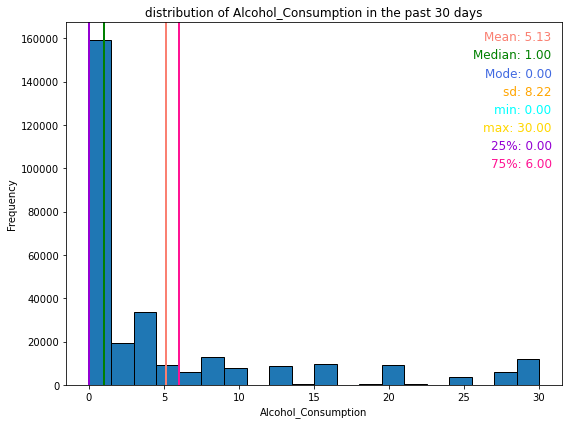

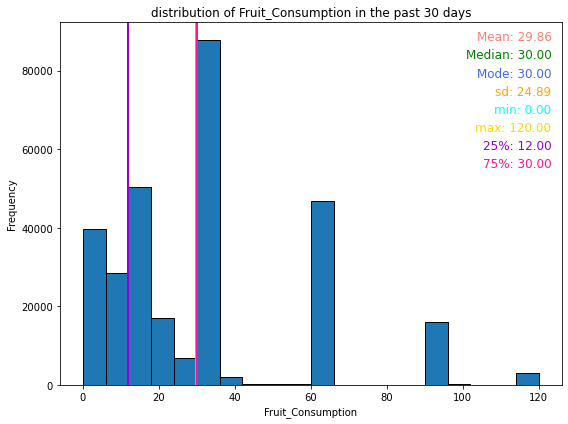

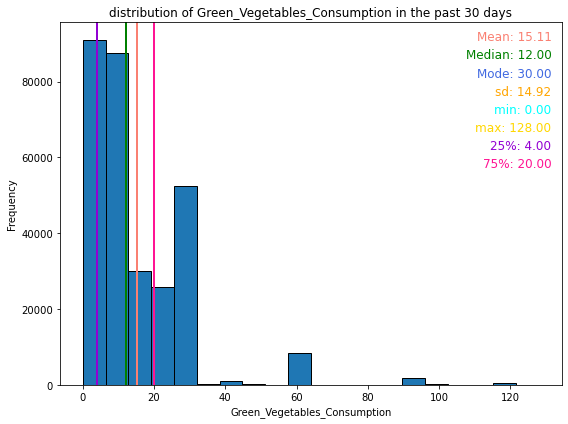

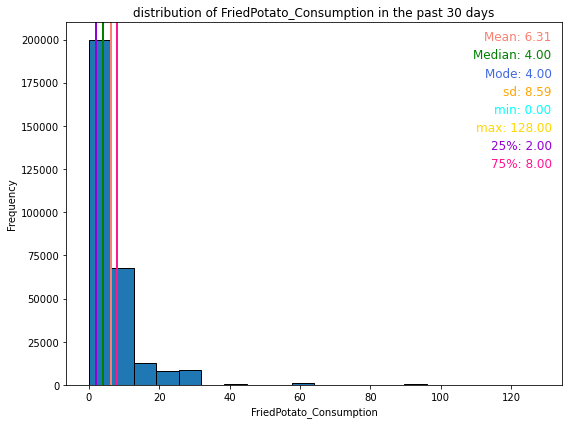

In [181]:
for col in numerical_cols:
        plot_numerical(df,col)

# Research Question

1. Does an increase in fruit consumption cause an increase in BMI?
2. Does an increase in alcohol consumption cause an increase in the probability for heart disease?
3. Is there a difference between the weight of smokers and nonsmokers?